In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

titanic_df = sns.load_dataset('titanic')


In [9]:
titanic_df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [6]:
who


Pipeline	 SimpleImputer	 StandardScaler	 TruncatedSVD	 np	 pd	 sns	 titanic	 


In [10]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [16]:
## Proccess the data
## Selectingg features for SVD
features = ['pclass', 'age', 'sex', 'survived', 'fare']

## Pipeline for numeric features from titanic dataset
numeric_features = ['age', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

## Pipeline for categorical features from titanic dataset
categorical_features = ['pclass', 'sex']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

## Preprocessor
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
## Apply preprocessing to titanic dataset
x = preprocessor.fit_transform(titanic_df[features])

                        

In [17]:
x.shape

(891, 7)

In [18]:
x

array([[-0.56573646, -0.50244517,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 0.66386103,  0.78684529,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.25833709, -0.48885426,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [-0.1046374 , -0.17626324,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       [-0.25833709, -0.04438104,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.20276197, -0.49237783,  0.        , ...,  1.        ,
         0.        ,  1.        ]], shape=(891, 7))

In [20]:
titanic_df[features].head()

,pclass,age,sex,survived,fare
0,3,22.0,male,0,7.2500
1,1,38.0,female,1,71.2833
2,3,26.0,female,1,7.9250
3,1,35.0,female,1,53.1000
4,3,35.0,male,0,8.0500


In [21]:
## Perform SVD 
svd = TruncatedSVD(n_components=4)
Y = svd.fit_transform(x)

print("Singular Values:", svd.singular_values_)
print("Explained Varaiance Ratio:", svd.explained_variance_ratio_)

Singular Values: [34.0919237  29.83381513 28.43241553 18.6007055 ]
Explained Varaiance Ratio: [0.37544109 0.16349524 0.21253133 0.12019999]


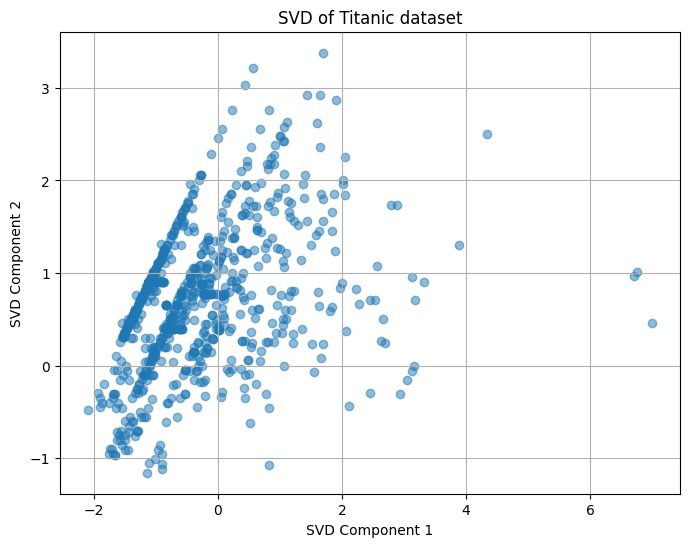

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(Y[:, 0], Y[:, 1], alpha=0.5)
# Labels and title
plt.xlabel('SVD Component 1')       
plt.ylabel('SVD Component 2')       
plt.title('SVD of Titanic dataset')  

# Grid
plt.grid(True)

# Show plot
plt.show()